Import Library

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import cv2

Upload File 30 Citra Tulisan Tangan

In [3]:
uploaded = files.upload()

Saving 1_1.jpg to 1_1.jpg
Saving 1_2.jpg to 1_2.jpg
Saving 1_3.jpg to 1_3.jpg
Saving 1_4.jpg to 1_4.jpg
Saving 1_5.jpg to 1_5.jpg
Saving 1_6.jpg to 1_6.jpg
Saving 1_7.jpg to 1_7.jpg
Saving 1_8.jpg to 1_8.jpg
Saving 1_9.jpg to 1_9.jpg
Saving 1_10.jpg to 1_10.jpg
Saving 2_1.jpg to 2_1.jpg
Saving 2_2.jpg to 2_2.jpg
Saving 2_3.jpg to 2_3.jpg
Saving 2_4.jpg to 2_4.jpg
Saving 2_5.jpg to 2_5.jpg
Saving 2_6.jpg to 2_6.jpg
Saving 2_7.jpg to 2_7.jpg
Saving 2_8.jpg to 2_8.jpg
Saving 2_9.jpg to 2_9.jpg
Saving 2_10.jpg to 2_10.jpg
Saving 8_1.jpg to 8_1.jpg
Saving 8_2.jpg to 8_2.jpg
Saving 8_3.jpg to 8_3.jpg
Saving 8_4.jpg to 8_4.jpg
Saving 8_5.jpg to 8_5.jpg
Saving 8_6.jpg to 8_6.jpg
Saving 8_7.jpg to 8_7.jpg
Saving 8_8.jpg to 8_8.jpg
Saving 8_9.jpg to 8_9.jpg
Saving 8_10.jpg to 8_10.jpg


In [4]:
print(uploaded.keys())

dict_keys(['1_1.jpg', '1_2.jpg', '1_3.jpg', '1_4.jpg', '1_5.jpg', '1_6.jpg', '1_7.jpg', '1_8.jpg', '1_9.jpg', '1_10.jpg', '2_1.jpg', '2_2.jpg', '2_3.jpg', '2_4.jpg', '2_5.jpg', '2_6.jpg', '2_7.jpg', '2_8.jpg', '2_9.jpg', '2_10.jpg', '8_1.jpg', '8_2.jpg', '8_3.jpg', '8_4.jpg', '8_5.jpg', '8_6.jpg', '8_7.jpg', '8_8.jpg', '8_9.jpg', '8_10.jpg'])


Memuat Dataset MNIST

In [5]:
#muat dataset mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#tampilkan bentuk dataset
print(f"Shape x_train : {x_train.shape}")
print(f"Shape y_train : {y_train.shape}")
print(f"Shape x_test : {x_test.shape}")
print(f"Shape x_test : {y_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape x_train : (60000, 28, 28)
Shape y_train : (60000,)
Shape x_test : (10000, 28, 28)
Shape x_test : (10000,)


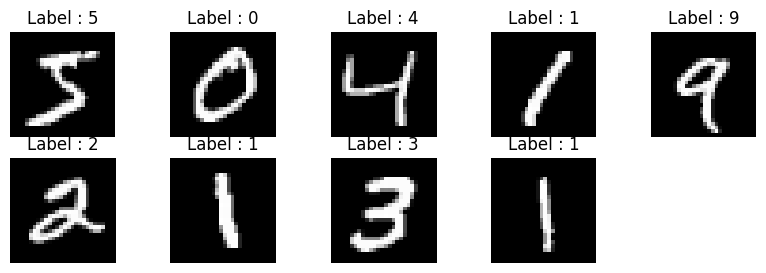

In [6]:
#Visualisasi gambar
plt.figure(figsize = (10, 3))
for i in range(9):
  plt.subplot(2, 5, i+1)
  plt.imshow(x_train[i], cmap = 'gray')
  plt.title(f"Label : {y_train[i]}")
  plt.axis('off')
plt.show()

In [7]:
#normalisasi = ubah tipe data dan skala

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#reshape data : tambahkan dimensi channel dan pixel menjadi 28px

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


print(f"shape x_train setelah di reshape : {x_train.shape}")

shape x_train setelah di reshape : (60000, 28, 28, 1)


Mengubah label kelas (angka 0–9) menjadi bentuk one-hot encoding

In [8]:
#one hot encode label

num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

print(f"shape y_train sebelum encoding : {y_train.shape}")
print(f"shape y_train setelah di encoding : {y_train_cat.shape}")
print(f"5 label pertama setelah encoding: \n {y_train_cat[:5]}")

shape y_train sebelum encoding : (60000,)
shape y_train setelah di encoding : (60000, 10)
5 label pertama setelah encoding: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Pemodelan dan pelatihan CNN

In [9]:
input_shape = (28, 28, 1)

#bangun model CNN
model = Sequential([
    #layer conv pertama
    Conv2D(32, kernel_size =(3, 3), activation = 'relu', input_shape = input_shape), MaxPooling2D((2,2)),

    #layer conv kedua
    Conv2D(64, kernel_size = (3, 3), activation = 'relu'),
    MaxPooling2D((2, 2)),

    #flatten layer
    Flatten(),

    #fully connected layer dengan dropout
    Dense(128, activation = 'relu'),
    Dropout(0.5), #mencegah overfitting

    #output layer (10 kelas, softwre untuk kjlasifikasi)
    Dense(num_classes, activation = 'softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
#Kompilasi model

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

Proses Pelatihan Model

In [11]:
#Pelatihan model
batch_size = 128
epochs = 10

#latih modelnya
print("training..,.,.,")
history = model.fit(x_train, y_train_cat,
                   batch_size = batch_size,
                   epochs = epochs,
                   verbose = 1,
                   validation_data = (x_test, y_test_cat))
print("done")

training..,.,.,
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 98ms/step - accuracy: 0.8108 - loss: 0.6026 - val_accuracy: 0.9811 - val_loss: 0.0572
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 100ms/step - accuracy: 0.9714 - loss: 0.0973 - val_accuracy: 0.9865 - val_loss: 0.0377
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 99ms/step - accuracy: 0.9807 - loss: 0.0698 - val_accuracy: 0.9871 - val_loss: 0.0352
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 99ms/step - accuracy: 0.9848 - loss: 0.0526 - val_accuracy: 0.9904 - val_loss: 0.0285
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 100ms/step - accuracy: 0.9865 - loss: 0.0431 - val_accuracy: 0.9923 - val_loss: 0.0237
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 99ms/step - accuracy: 0.9885 - loss: 0.0375 - val_accuracy: 0.9912 - val_loss: 0.0263
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 101ms/step - accuracy: 0.9900 - loss: 0.0322 - val_accuracy: 0.9899 - val_loss: 0.0287
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 104ms/step - accuracy: 0.99

Evaluasi Model

In [12]:
score = model.evaluate(x_test, y_test_cat, verbose = 0)
print('-'* 40)
print(f"test loss: {score[0]:.4f}")
print(f"test accuracy: {score[1]*100:.2f}%")
print('-' * 40)

----------------------------------------
test loss: 0.0230
test accuracy: 99.28%
----------------------------------------


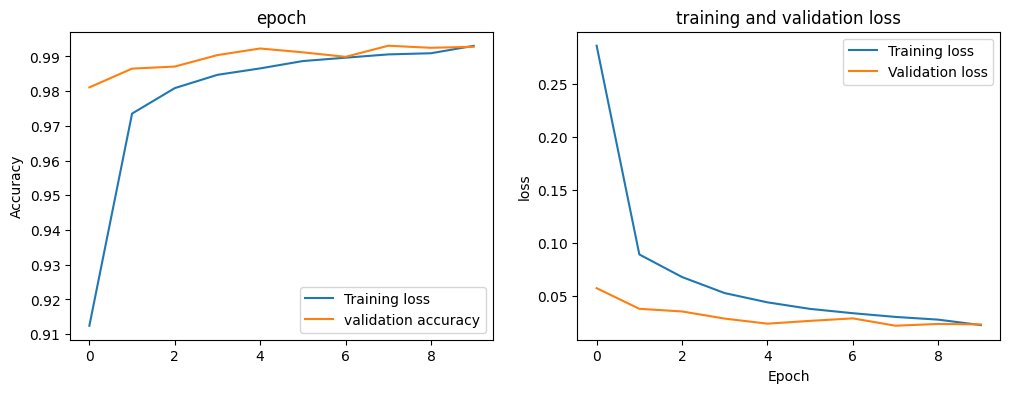

In [13]:
#plot accuracy

plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'Training loss')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.title('training and validation accuracy')
plt.title('epoch')
plt.ylabel('Accuracy')
plt.legend()

#plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.title('training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()

plt.show()

Melakukan pra-pemrosesan pada kumpulan gambar tulisan tangan yang diunggah agar sesuai dengan format input model CNN MNIST

In [14]:
predictions = {}
data_citra = []   # untuk menyimpan gambar hasil preprocessing
label_citra = []   # label asli
file_names = []


for filename in uploaded.keys():
    # Ambil label dari nama file, misal "2_4.png" -> label = 2
    true_label = int(filename.split('_')[0])
    label_citra.append(true_label)
    file_names.append(filename)

    # Baca gambar
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

    # Inversi warna (karena MNIST: background hitam, angka putih)
    img_inverted = cv2.bitwise_not(img)

    # Resize ke 28x28
    img_resized = cv2.resize(img_inverted, (28, 28))

    # Normalisasi (0–1)
    img_normalized = img_resized / 255.0

    # Reshape agar cocok untuk CNN (1 channel)
    img_ready = img_normalized.reshape(28, 28, 1)
    data_citra.append(img_ready)


Persiapan Prediksi

In [15]:
data_citra = np.array(data_citra)
data_citra = data_citra.reshape(-1, 28, 28, 1)

print("Jumlah citra siap prediksi:", data_citra.shape[0])
print("Contoh dimensi citra:", data_citra[0].shape)

Jumlah citra siap prediksi: 30
Contoh dimensi citra: (28, 28, 1)


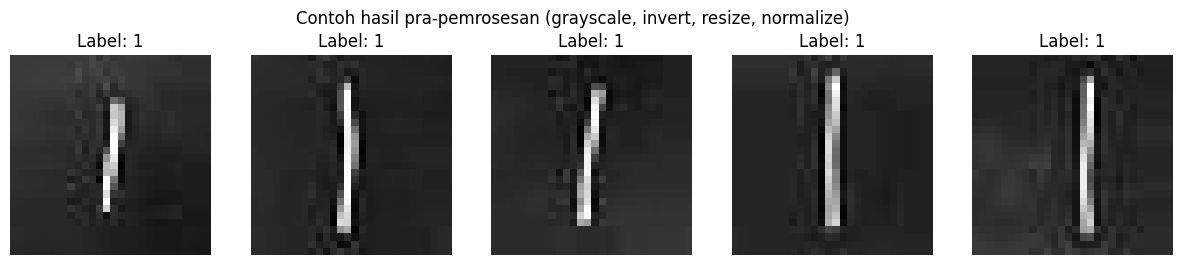

In [21]:
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(data_citra[i].squeeze(), cmap='gray')
    plt.title(f"Label: {label_citra[i]}")
    plt.axis('off')
plt.suptitle("Contoh hasil pra-pemrosesan (grayscale, invert, resize, normalize)")
plt.show()

Proses Prediksi

In [17]:
pred = model.predict(data_citra)
hasil = np.argmax(pred, axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


In [22]:
benar = 0
print("\n=== HASIL PREDIKSI SETIAP CITRA ===\n")
for i, (true, pred, fname) in enumerate(zip(label_citra, hasil, file_names), start=1):
    status = "Benar" if true == pred else "Salah"
    if true == pred:
        benar += 1
    print(f"Citra ke-{i} ({fname}) → Label Asli: {true} | Prediksi Model: {pred} → {status}")


=== HASIL PREDIKSI SETIAP CITRA ===

Citra ke-1 (1_1.jpg) → Label Asli: 1 | Prediksi Model: 1 → Benar
Citra ke-2 (1_2.jpg) → Label Asli: 1 | Prediksi Model: 1 → Benar
Citra ke-3 (1_3.jpg) → Label Asli: 1 | Prediksi Model: 1 → Benar
Citra ke-4 (1_4.jpg) → Label Asli: 1 | Prediksi Model: 1 → Benar
Citra ke-5 (1_5.jpg) → Label Asli: 1 | Prediksi Model: 1 → Benar
Citra ke-6 (1_6.jpg) → Label Asli: 1 | Prediksi Model: 1 → Benar
Citra ke-7 (1_7.jpg) → Label Asli: 1 | Prediksi Model: 1 → Benar
Citra ke-8 (1_8.jpg) → Label Asli: 1 | Prediksi Model: 1 → Benar
Citra ke-9 (1_9.jpg) → Label Asli: 1 | Prediksi Model: 1 → Benar
Citra ke-10 (1_10.jpg) → Label Asli: 1 | Prediksi Model: 1 → Benar
Citra ke-11 (2_1.jpg) → Label Asli: 2 | Prediksi Model: 2 → Benar
Citra ke-12 (2_2.jpg) → Label Asli: 2 | Prediksi Model: 2 → Benar
Citra ke-13 (2_3.jpg) → Label Asli: 2 | Prediksi Model: 2 → Benar
Citra ke-14 (2_4.jpg) → Label Asli: 2 | Prediksi Model: 2 → Benar
Citra ke-15 (2_5.jpg) → Label Asli: 2 | Predik

In [19]:
total = len(label_citra)
akurasi = benar / total * 100
print(f"\nAkurasi model terhadap 30 citra tulisan tangan: {akurasi:.2f}%")


Akurasi model terhadap 30 citra tulisan tangan: 100.00%


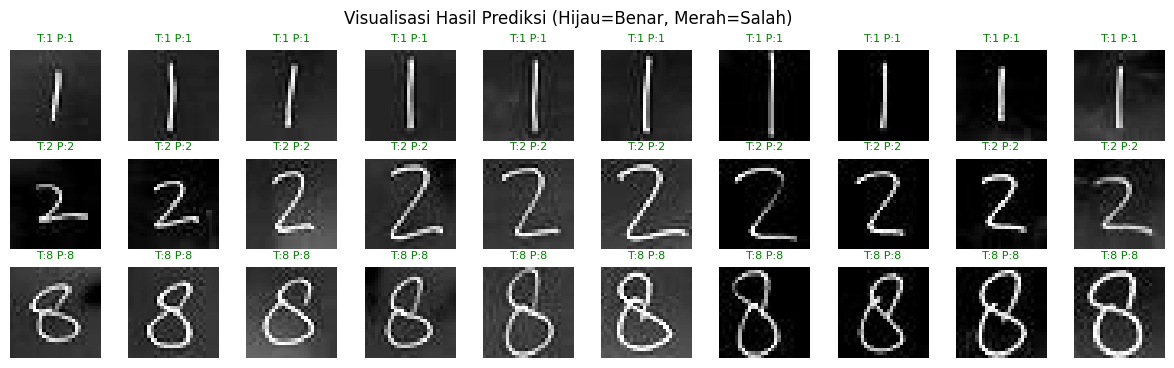

In [20]:
plt.figure(figsize=(15, 4))
for i in range(len(data_citra)):
    plt.subplot(3, 10, i + 1)
    plt.imshow(data_citra[i].squeeze(), cmap='gray')
    color = 'green' if label_citra[i] == hasil[i] else 'red'
    plt.title(f"T:{label_citra[i]} P:{hasil[i]}", color=color, fontsize=8)
    plt.axis('off')
plt.suptitle("Visualisasi Hasil Prediksi (Hijau=Benar, Merah=Salah)")
plt.show()